In [41]:
import geopandas as gpd
import numpy as np
import shapely

### Calculate total predicted solar PV array area for each municipality/town in Connecticut (CT)

Read all predicted polygons throughout CT. Predicted polygons can be downloaded [here](https://duke.box.com/s/8whjl21d48axlilaei3lgwxikqst9ba0).

In [2]:
polygons = gpd.read_file('ct_polygons_updated_oct2021.geojson')

In [7]:
polygons.head()

,area_px,use_type,object_id,tile_name,area_sqm,geometry
0,107,residential,930725_ne_1,930725_ne,7.913764,"POLYGON ((-72.98939 41.45877, -72.98940 41.458..."
1,19,residential,930725_ne_1,930725_ne,1.079150,"POLYGON ((-72.98938 41.45875, -72.98939 41.458..."
2,16,residential,795625_se_1,795625_se,0.629504,"POLYGON ((-73.47833 41.17982, -73.47833 41.179..."
3,74,residential,795625_se_1,795625_se,5.305819,"POLYGON ((-73.47838 41.17981, -73.47838 41.179..."
4,33,residential,795625_se_1,795625_se,1.843547,"POLYGON ((-73.47843 41.17978, -73.47843 41.179..."


Read CT town level boundary map. Downloaded from [2010 U.S. Census](http://magic.lib.uconn.edu/magic_2/vector/37800/townct_37800_0000_2010_s100_census_1_t.htm)

In [12]:
ct_town_boundaries = gpd.read_file('townct_37800_0000_2010_s100_census_1_shp/wgs84/townct_37800_0000_2010_s100_census_1_shp_wgs84.shp')
ct_town_boundaries = ct_town_boundaries.query('NAME10 != "County subdivisions not defined"') # Remove invalid rows

In [6]:
ct_town_boundaries.head()

,STATEFP10,COUNTYFP10,COUSUBFP10,COUSUBNS10,GEOID10,NAME10,NAMELSAD10,LSAD10,CLASSFP10,MTFCC10,...,NECTAFP10,NCTADVFP10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,GEOID_AFF2,GEOID_AFF1,geometry
0,09,001,00000,00000000,0900100000,County subdivisions not defined,County subdivisions not defined,00,Z9,G4040,...,None,None,F,0,302060009,+41.0779471,-073.2165184,0600000US0900100000,06000US0900100000,"POLYGON ((-73.10137 41.16388, -73.09614 41.159..."
1,09,001,04720,00213390,0900104720,Bethel,Bethel town,43,T1,G4040,...,72850,None,A,43741119,100805,+41.3697777,-073.3895032,0600000US0900104720,06000US0900104720,"POLYGON ((-73.43371 41.36737, -73.43423 41.368..."
2,09,001,08070,00213396,0900108070,Bridgeport,Bridgeport town,43,T5,G4040,...,71950,None,C,41372169,8719037,+41.1873858,-073.1957339,0600000US0900108070,06000US0900108070,"POLYGON ((-73.23338 41.14300, -73.23361 41.143..."
3,09,001,08980,00213399,0900108980,Brookfield,Brookfield town,43,T1,G4040,...,72850,None,A,51211648,1543913,+41.4698845,-073.3936666,0600000US0900108980,06000US0900108980,"POLYGON ((-73.42154 41.44794, -73.42258 41.451..."
4,09,001,18500,00213415,0900118500,Danbury,Danbury town,43,T5,G4040,...,72850,None,C,108499386,5829369,+41.4018389,-073.4722848,0600000US0900118500,06000US0900118500,"POLYGON ((-73.42378 41.45487, -73.42294 41.452..."


In [3]:
polygons.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
ct_town_boundaries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Two geospatial datasets have the same coordinates reference system (CRS), so no conversion is needed. We then find the geospatial intersection of the two datasets.

In [13]:
intersection = gpd.overlay(polygons, ct_town_boundaries, how='intersection')

Now each polygon row has information of the town it intersects with.

In [16]:
intersection.head()

,area_px,use_type,object_id,tile_name,area_sqm,STATEFP10,COUNTYFP10,COUSUBFP10,COUSUBNS10,GEOID10,...,NECTAFP10,NCTADVFP10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,GEOID_AFF2,GEOID_AFF1,geometry
0,107,residential,930725_ne_1,930725_ne,7.913764,09,009,04580,00213389,0900904580,...,75700,None,A,54724417,996204,+41.4229640,-072.9941871,0600000US0900904580,06000US0900904580,"POLYGON ((-72.98939 41.45877, -72.98939 41.458..."
1,19,residential,930725_ne_1,930725_ne,1.079150,09,009,04580,00213389,0900904580,...,75700,None,A,54724417,996204,+41.4229640,-072.9941871,0600000US0900904580,06000US0900904580,"POLYGON ((-72.98938 41.45875, -72.98937 41.458..."
2,75,residential,930705_sw_1,930705_sw,4.316599,09,009,04580,00213389,0900904580,...,75700,None,A,54724417,996204,+41.4229640,-072.9941871,0600000US0900904580,06000US0900904580,"MULTIPOLYGON (((-73.00141 41.39690, -73.00141 ..."
3,13,residential,930705_sw_2,930705_sw,0.494610,09,009,04580,00213389,0900904580,...,75700,None,A,54724417,996204,+41.4229640,-072.9941871,0600000US0900904580,06000US0900904580,"POLYGON ((-73.00141 41.39573, -73.00141 41.395..."
4,64,residential,925715_ne_1,925715_ne,4.361563,09,009,04580,00213389,0900904580,...,75700,None,A,54724417,996204,+41.4229640,-072.9941871,0600000US0900904580,06000US0900904580,"POLYGON ((-73.01108 41.43586, -73.01108 41.435..."


We can then calculate the total polygon size grouping by each town. Only residential solar PV polygons are included.

In [20]:
ct_panel_area = intersection.query('use_type == "residential"').groupby('NAME10').sum()

Now we have the total panel area aggregated by town (`area_px` for pixel area, and `area_sqm` for area in $m^2$).

In [21]:
ct_panel_area.head()

,area_px,area_sqm,ALAND10,AWATER10
NAME10,,,,
Andover,9424,751.987443,1120244412,17910340
Ansonia,46954,3744.289547,2587747772,72244694
Ashford,36631,2900.349561,13753793598,251095244
Avon,61603,4921.282091,13852721190,262229121
Barkhamsted,12468,998.078527,4131457968,293544504


### Plot panel area density at different resolution

We first plot the total panel area by town.

In [34]:
# Add geometry information (town boundary polygon) to aggregated panel area by town.
ct_town_geometry = ct_town_boundaries[['NAME10', 'geometry']]
ct_town_geometry = ct_town_geometry.set_index('NAME10')
ct_panel_area = ct_panel_area.join(ct_town_geometry, how='left')

In [35]:
ct_panel_area

,area_px,area_sqm,ALAND10,AWATER10,geometry
NAME10,,,,,
Andover,9424,751.987443,1120244412,17910340,"POLYGON ((-72.42150 41.73202, -72.42143 41.732..."
Ansonia,46954,3744.289547,2587747772,72244694,"POLYGON ((-73.09490 41.36058, -73.09481 41.360..."
Ashford,36631,2900.349561,13753793598,251095244,"POLYGON ((-72.12654 41.90101, -72.12558 41.899..."
Avon,61603,4921.282091,13852721190,262229121,"POLYGON ((-72.88069 41.76540, -72.88094 41.765..."
Barkhamsted,12468,998.078527,4131457968,293544504,"POLYGON ((-72.93978 41.89526, -72.94065 41.895..."
...,...,...,...,...,...
Windsor Locks,60924,4710.488194,7245006900,274400530,"POLYGON ((-72.62268 41.91712, -72.62266 41.916..."
Wolcott,64375,5122.228748,12331571367,402100682,"POLYGON ((-73.00247 41.57431, -73.00368 41.575..."
Woodbridge,36894,2920.493688,7113458866,141903386,"POLYGON ((-73.04889 41.38414, -73.04846 41.388..."


<AxesSubplot:>

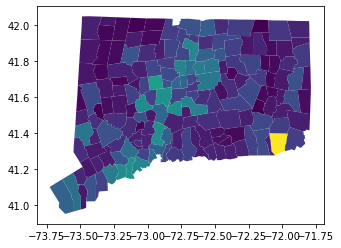

In [36]:
ct_panel_area.plot(column='area_sqm')

As shown above, to plot panel area density at a given resolution, you'll need:
1. Predicted solar panel polygons with geospatial coordinates.
2. A set of boundaries to aggregate panel area at. This can be any grid at any resolution. In the example above, we used CT town boundaries.

We now show another example of plotting aggregated panel area at $25 km^2$ grid throughout CT.

In [37]:
def make_grid(total_bounds, grid_size_metre=1000):
    """Generate grid cells within a bounded area

    Args:
        total_bounds (tuple): x,y min and max boundaries, in meter-unit CRS
        grid_size_metre (int, optional): The size of each grid cell. Defaults to 1000.

    Returns:
        GeoDataFrame: generated grid cells
    """
    
    xmin, ymin, xmax, ymax = total_bounds
    
    grid_cells = []
    for x0 in np.arange(xmin, xmax+grid_size_metre, grid_size_metre):
        for y0 in np.arange(ymin, ymax+grid_size_metre, grid_size_metre):
            # bounds
            x1 = x0 - grid_size_metre
            y1 = y0 + grid_size_metre
            grid_cells.append(shapely.geometry.box(x0, y0, x1, y1))
    
    cell_gdf = gpd.GeoDataFrame(grid_cells, columns=['geometry'], crs='epsg:6433') # EPSG:6433 is the metre-unit CRS covering Connecticut
    cell_gdf['cell_id'] = np.arange(len(cell_gdf)).astype(str)
    
    return cell_gdf.to_crs('epsg:4326')


def make_state_grid(grid_cells, state_boundary):
    """Clip generated grid within state boundary

    Args:
        grid_cells (GeoDataFrame): generated grid cells
        state_boundary (GeoDataFrame): state outer boundary

    Returns:
        GeoDataFrame: grid cells bounded by state boundary
    """
    state_grid = gpd.overlay(
        grid_cells,
        state_boundary,
        how='intersection'
    )
    
    return state_grid

In [38]:
ct_state_boundaries = gpd.GeoDataFrame(geometry=[ct_town_geometry.geometry.unary_union], crs=ct_town_geometry.crs) # Get state outer boundary from town level boundary

<AxesSubplot:>

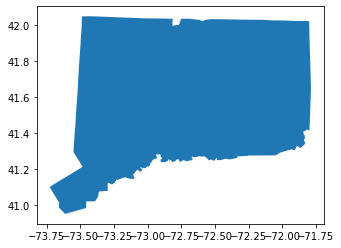

In [39]:
ct_state_boundaries.plot()

In [45]:
grid_size_metre = 5000 # Size in metre of each square grid cell

ct_state_grid = make_state_grid(
    make_grid(ct_state_boundaries.to_crs('epsg:6433').total_bounds, grid_size_metre), # EPSG:6433 is the metre-unit CRS covering Connecticut
    ct_state_boundaries
)

<AxesSubplot:>

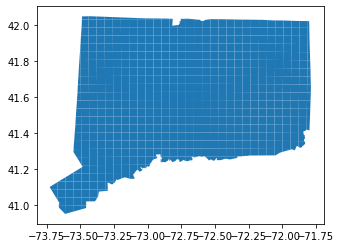

In [46]:
ct_state_grid.plot()

Now we have the $25 km^2$ grid for the entire state of CT. We can then find the geospatial intersection of the grid cells and predicted polygons to get the total panel area by town, and then plot panel area density by town.

In [48]:
ct_state_grid.head()

,cell_id,geometry
0,27,"POLYGON ((-73.67861 41.04048, -73.66741 41.040..."
1,28,"POLYGON ((-73.71500 41.08520, -73.66804 41.085..."
2,29,"POLYGON ((-73.66864 41.12825, -73.66804 41.085..."
3,52,"POLYGON ((-73.65949 40.99561, -73.60736 40.996..."
4,53,"POLYGON ((-73.66721 41.02611, -73.66741 41.040..."


In [62]:
grid_intersection.head()

,area_px,use_type,object_id,tile_name,area_sqm,cell_id,geometry
0,107,residential,930725_ne_1,930725_ne,7.913764,349,"POLYGON ((-72.98939 41.45877, -72.98939 41.458..."
1,19,residential,930725_ne_1,930725_ne,1.079150,349,"POLYGON ((-72.98938 41.45875, -72.98937 41.458..."
2,466,residential,935720_ne_1,935720_ne,37.275627,349,"POLYGON ((-72.97203 41.45021, -72.97203 41.450..."
3,169,residential,930730_sw_1,930730_sw,12.859867,349,"POLYGON ((-72.99925 41.47044, -72.99925 41.470..."
4,499,residential,930720_ne_1,930720_ne,39.029245,349,"POLYGON ((-72.99294 41.44947, -72.99293 41.449..."


<AxesSubplot:>

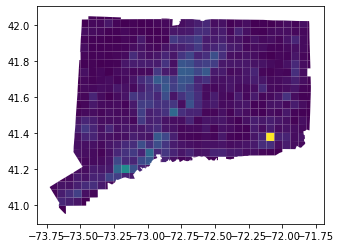

In [61]:
grid_intersection = gpd.overlay(polygons, ct_state_grid, how='intersection')
ct_panel_area_grid = grid_intersection.query('use_type == "residential"').groupby('cell_id').sum()
ct_panel_area_grid = ct_panel_area_grid.join(
    ct_state_grid.set_index('cell_id'), how='left'
)
ct_panel_area_grid.plot(column='area_sqm')